# 1章：時系列データの記述・処理

時系列データの構成要素  
- 傾向変動：トレンド、長期変動、trend variation
- 季節変動：seasonal variation
- 不規則変動：irregular variation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 移動平均の例
df_historical = pd.read_csv("/content/drive/MyDrive/2023/業務連携/技術道場/時系列解析/m_quote.csv", encoding="shiftjis", header=1)
df_historical

,Unnamed: 0,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,...,HUF,CZK,PLN,TRY,IDR(100).1,CNY.1,MYR.1,KRW(100).1,TWD,RUB
0,2002/4/30,131.15,189.01,115.97,82.83,79.13,12.73,15.61,15.20,70.24,...,*****,*****,*****,NaN,1.39,15.84,*****,9.99,3.77,NaN
1,2002/5/31,126.44,184.56,115.88,81.58,79.60,12.57,15.59,15.43,69.58,...,*****,*****,*****,NaN,1.41,15.28,*****,10.10,3.68,NaN
2,2002/6/28,123.53,183.00,117.83,80.64,80.09,12.94,15.86,15.92,70.29,...,*****,*****,*****,NaN,1.44,14.93,*****,10.20,3.66,NaN
3,2002/7/31,118.05,183.64,117.23,76.52,80.16,12.67,15.79,15.83,65.42,...,*****,*****,*****,NaN,1.34,14.26,*****,9.98,3.56,NaN
4,2002/8/30,119.08,183.14,116.45,75.85,79.60,12.59,15.69,15.68,64.47,...,*****,*****,*****,NaN,1.35,14.39,*****,9.97,3.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2022/11/30,142.49,167.10,145.19,105.99,147.56,13.34,19.52,14.04,93.92,...,0.36,5.97,30.91,7.66,0.91,*****,30.89,10.49,4.53,2.33
248,2022/12/30,135.23,164.57,143.01,99.53,144.91,13.02,19.23,13.69,91.14,...,0.35,5.9,30.58,7.26,0.87,*****,30.67,10.45,4.41,2.06
249,2023/1/31,130.24,159.56,140.53,97.04,140.95,12.55,18.89,13.11,90.65,...,0.36,5.88,29.91,6.93,0.86,*****,30.17,10.49,4.29,1.87
250,2023/2/28,132.76,160.55,142.31,98.86,143.62,12.72,19.12,13.00,91.78,...,0.37,6,30.03,7.05,0.88,*****,30.49,10.43,4.40,1.83


<Axes: >

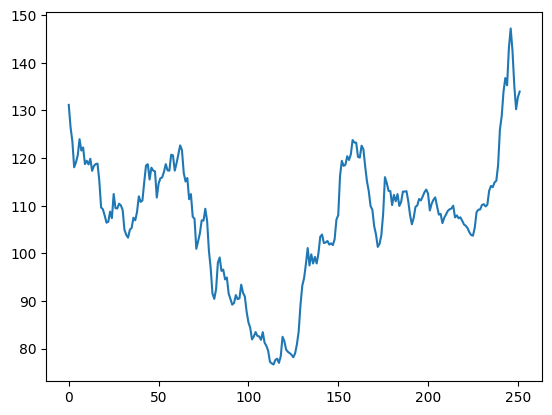

In [4]:
df_historical.USD.plot()

<Axes: >

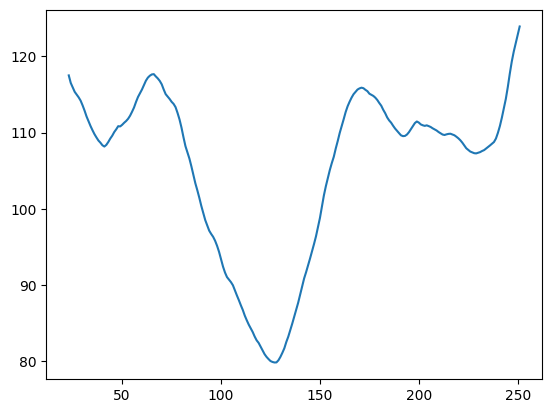

In [5]:
df_historical.USD.rolling(24).mean().plot()

<Axes: >

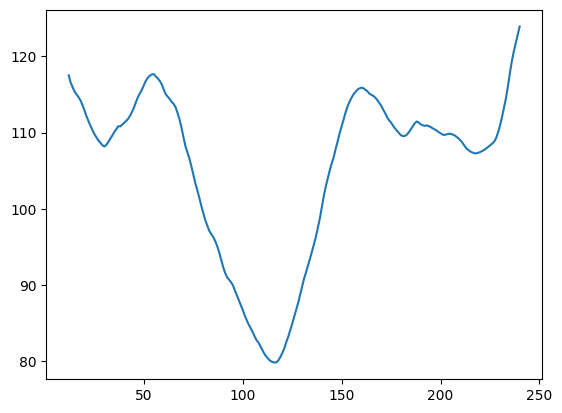

In [6]:
df_historical.USD.rolling(window=24, center=True).mean().plot()

In [7]:
# 中心化移動平均
# 変動周期に合わせたウインドウサイズを用いた移動平均をとれば、原系列データから季節変動のパターンを取り除くことができる
df_ice = pd.read_csv("/content/drive/MyDrive/2023/業務連携/技術道場/時系列解析/icecream.csv", encoding="shiftjis", header=1)
df_ice

,年,月,アイスクリーム
0,2003,1,331
1,2003,2,268
2,2003,3,365
3,2003,4,492
4,2003,5,632
...,...,...,...
115,2012,8,1332
116,2012,9,849
117,2012,10,515
118,2012,11,326


<Axes: >

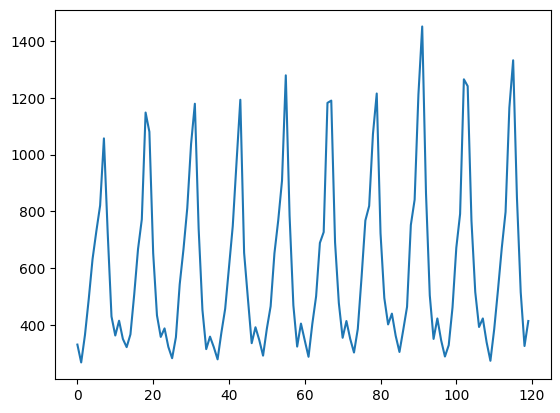

In [8]:
df_ice.アイスクリーム.plot()

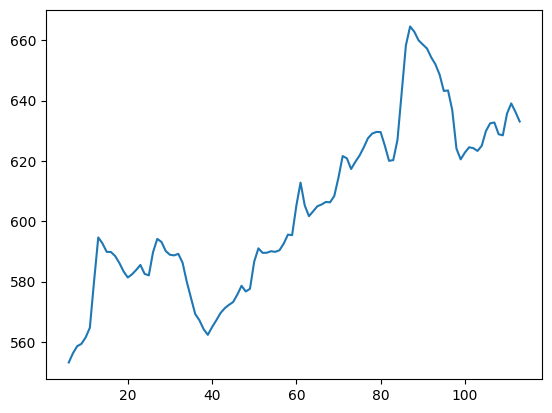

In [9]:
df_ma = df_ice.アイスクリーム.rolling(window=12).mean().shift(-6)
df_cma = df_ma.rolling(window=2).mean().plot()

In [10]:
# 季節調整
# →移動平均をとる
# 季節変動の周期がはっきりわかる　→　季節調整法のひとつであるセンサス局法


<Axes: >

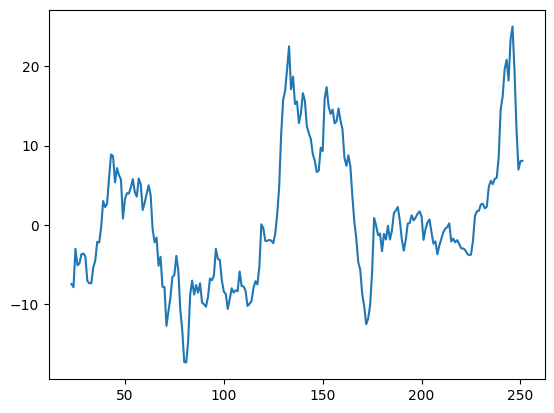

In [11]:
# 移動平均乖離率
ma24 = df_historical.USD.rolling(24).mean()
diff_ma24 = (df_historical.USD - ma24) / ma24 * 100
diff_ma24.plot()

<Axes: ylabel='Frequency'>

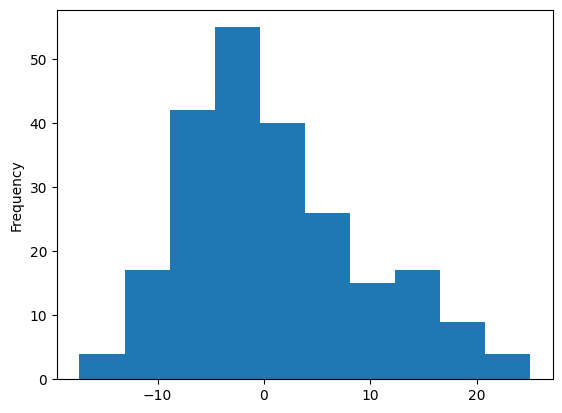

In [12]:
diff_ma24.plot.hist()
# 乖離率を用いた異常検知手法としてほてリング理論がある。

<Axes: ylabel='Frequency'>

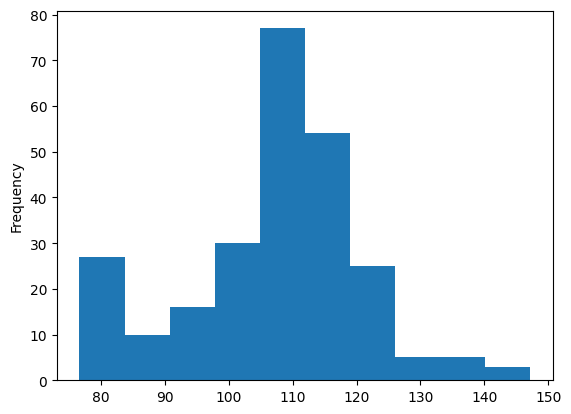

In [16]:
# 時系列データの基本と前処理
# 正規性の検定

# 原系列のヒストグラムの表示
df_historical.USD.plot.hist()

<Axes: ylabel='Frequency'>

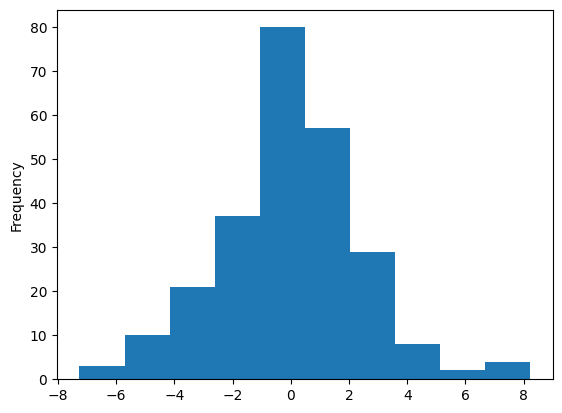

In [17]:
# 1階階差
# 階差をとることで値が欠損する行が生じるため、dropna()でその行を削除する
df_diff1 = df_historical.USD.diff().dropna()
df_diff1.plot.hist()

In [18]:
# Shapiro-Wilk検定（正規性の検定）
import scipy.stats as stats

# 原系列のShapiro-Wilk検定
print(stats.shapiro(df_historical.USD.values))

# 1次階差系列のShapiro-WIlk検定
print(stats.shapiro(df_diff1.values))

ShapiroResult(statistic=0.958949625492096, pvalue=1.3732246770814527e-06)
ShapiroResult(statistic=0.9835944175720215, pvalue=0.0054555535316467285)


In [21]:
# 時間依存性の発見（自己相関の検定）
import io
import requests
import statsmodels.api as sm

# 月ごとの旅客者数の乗客数データ
url = "https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv"
stream = requests.get(url).content
df_content = pd.read_csv(io.StringIO(stream.decode("utf-8")))
passengers = df_content["#Passengers"]

In [23]:
# 自己相関
p_acf = sm.tsa.stattools.acf(passengers)

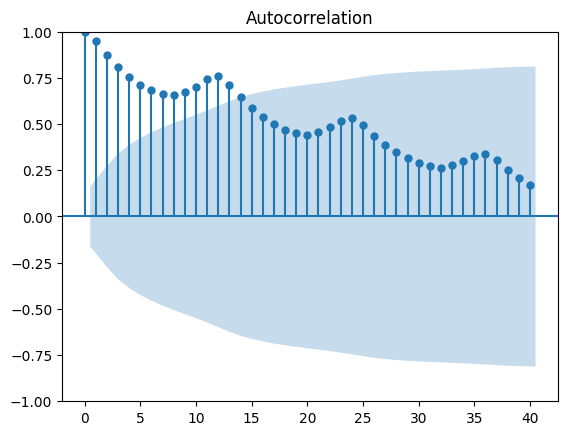

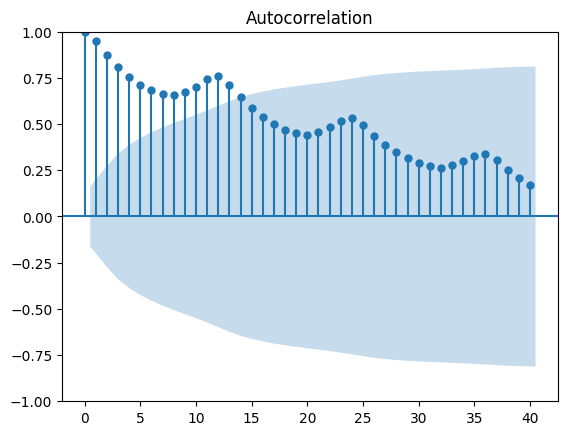

In [28]:
#コレログラムの表示
sm.graphics.tsa.plot_acf(passengers, lags=40)

In [40]:
# 上記には推移関係（transitive relation）が成り立つ
# 偏相関係数（PARCOR, PACF：partial autocorrelation）
# oslは後述する最小二乗法による推定を意味する
p_pacf = sm.tsa.stattools.pacf(passengers, nlags=40, method="ols")

In [41]:
p_pacf

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358,  0.8402143 ,  0.61268285, -0.66597616, -0.38463943,
        0.0787466 , -0.02663483, -0.05805221, -0.04350748,  0.27732556,
       -0.04046447,  0.13739883,  0.3859958 ,  0.24203808, -0.04912986,
       -0.19599778, -0.15443575,  0.04484465,  0.18371541, -0.0906113 ,
       -0.06202938,  0.34827092,  0.09899499, -0.08396793,  0.36328898,
       -0.17956662,  0.15839435,  0.06376775, -0.27503705,  0.2707607 ,
        0.32002003])

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


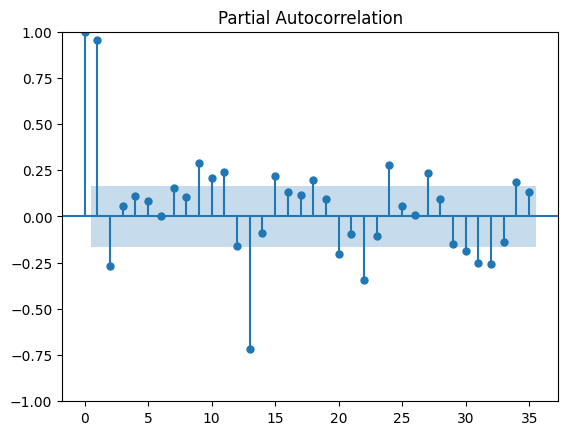

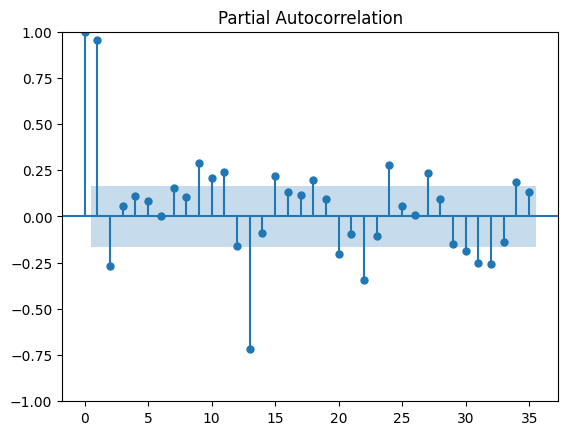

In [42]:
# コレログラム
sm.graphics.tsa.plot_pacf(passengers, lags=35)

In [43]:
# 定常性（時系列データの性質）
# 強定常性と弱定常性に分類される

# 2章：自己回帰型モデル